# Blood Glucose Control - EDA

**Name:** [Dhruva Shekdar]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [6]:
import pandas as pd

# reading separate patient files
df1 = pd.read_csv('../data/gluroo_500030.csv')
df2 = pd.read_csv('../data/gluroo_679372.csv')

# assigning unique identifiers to differentiate between PWDs
df1['pwd_id'] = '500030'
df2['pwd_id'] = '679372'

# combining dfs
df = pd.concat([df1, df2])

# removing un-needed columns
df = df.drop(columns=['sender_id', 'message_basal_change'])
df.head()

,date,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,__typename,trend,pwd_id
0,2024-05-01 00:00:27.029000-05:00,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

The 'date' column does not exist in the dataframe.


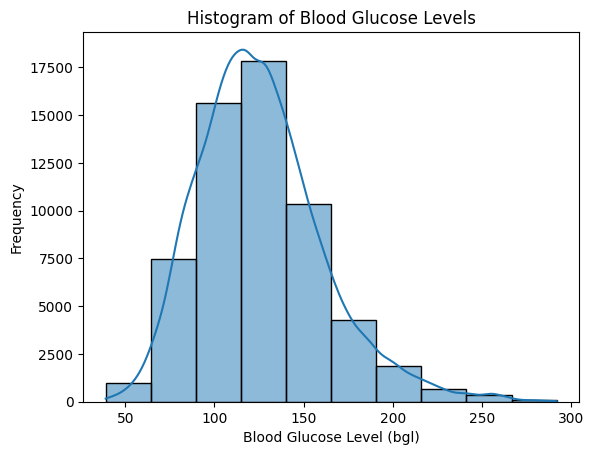

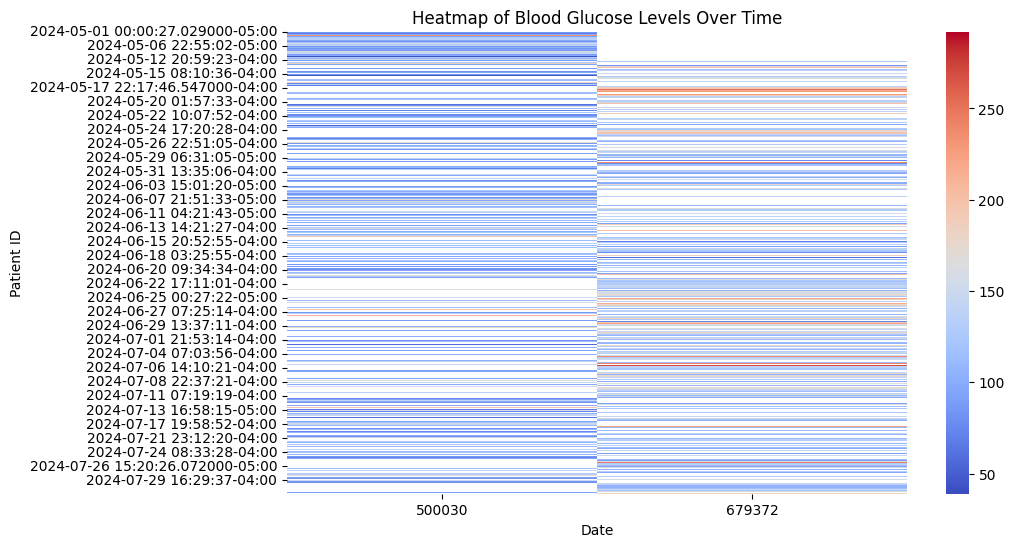

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the date column to datetime
# Check if 'date' column exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
else:
    print("The 'date' column does not exist in the dataframe.")
sns.histplot(df['bgl'], bins=10, kde=True)
plt.title('Histogram of Blood Glucose Levels')
plt.xlabel('Blood Glucose Level (bgl)')
plt.ylabel('Frequency')
plt.show()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(index='date', columns='pwd_id', values='bgl')
sns.heatmap(pivot_table, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Blood Glucose Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Patient ID')
plt.show()

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Given the data for Type 1 Diabetes (T1D) patients, how do genetic factors influence blood sugar management compared to other populations? Specifically, South Asian individuals are known to have higher risks and unique ways of managing blood sugar due to historical genetic factors. Is it possible to differentiate between various demographic groups based on their blood sugar data?
2. How does Type 1 Diabetes (T1D) exacerbate mental health issues such as depression, anxiety, and diabetes distress, and how do these mental health challenges, in turn, affect diabetes management, potentially leading to inconsistent data collection and an escalation in the severity of T1D?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`